In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install scipy
!pip install scikit-learn

# 데이터 로드

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

In [4]:
# 데이터 로드
file_path = '/content/drive/MyDrive/생명연구자원  AI 활용 경진대회/Dataset/'
train_df = pd.read_csv(file_path + 'train.csv')
test_df = pd.read_csv(file_path + 'test.csv')

In [ ]:
train_df.head()

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TRAIN_0000,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TRAIN_0001,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TRAIN_0002,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TRAIN_0003,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TRAIN_0004,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


# 데이터 특성 확인

## 빈도분석

Train data SUBCLASS distribution:
SUBCLASS
BRCA      0.126754
KIPAN     0.083051
GBMLGG    0.074343
STES      0.061119
KIRC      0.053862
THCA      0.052250
SKCM      0.044509
PRAD      0.042896
OV        0.040800
LGG       0.036930
HNSC      0.035962
COAD      0.035962
SARC      0.031930
UCEC      0.031930
LUAD      0.029673
LUSC      0.028705
LAML      0.025480
LIHC      0.025480
CESC      0.024996
PCPG      0.023706
TGCT      0.019997
PAAD      0.019352
BLCA      0.016771
THYM      0.015804
ACC       0.011611
DLBC      0.006128
Name: proportion, dtype: float64


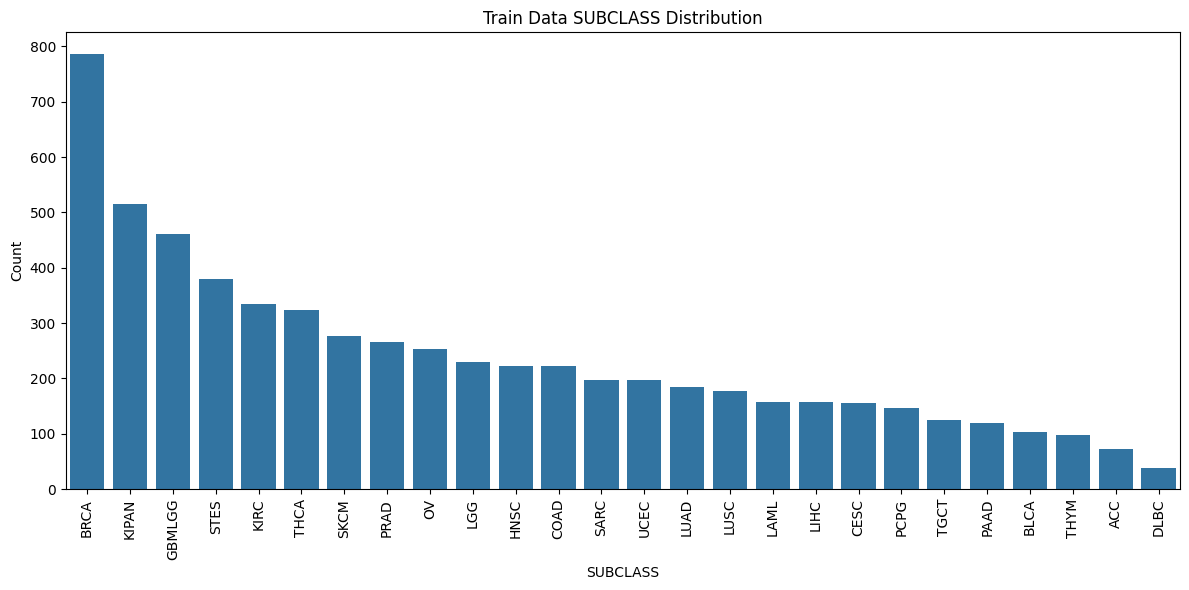


Test data does not contain SUBCLASS information.


In [ ]:
# 1. SUBCLASS 비율 확인
def plot_subclass_distribution(df, title):
    subclass_counts = df['SUBCLASS'].value_counts()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=subclass_counts.index, y=subclass_counts.values)
    plt.title(title)
    plt.xlabel('SUBCLASS')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

print("Train data SUBCLASS distribution:")
print(train_df['SUBCLASS'].value_counts(normalize=True))
plot_subclass_distribution(train_df, 'Train Data SUBCLASS Distribution')

if 'SUBCLASS' in test_df.columns:
    print("\nTest data SUBCLASS distribution:")
    print(test_df['SUBCLASS'].value_counts(normalize=True))
    plot_subclass_distribution(test_df, 'Test Data SUBCLASS Distribution')
else:
    print("\nTest data does not contain SUBCLASS information.")

# 2. 각 유전자별 변이 빈도 확인
def calculate_mutation_frequency(df):
    gene_columns = [col for col in df.columns if col not in ['ID', 'SUBCLASS']]
    mutation_freq = {}

    for gene in gene_columns:
        total = df[gene].count()
        mutations = df[df[gene] != 'WT'][gene].count()
        mutation_freq[gene] = mutations / total

    return pd.Series(mutation_freq).sort_values(ascending=False)

train_mutation_freq = calculate_mutation_frequency(train_df)

In [ ]:
test_mutation_freq = calculate_mutation_frequency(test_df)

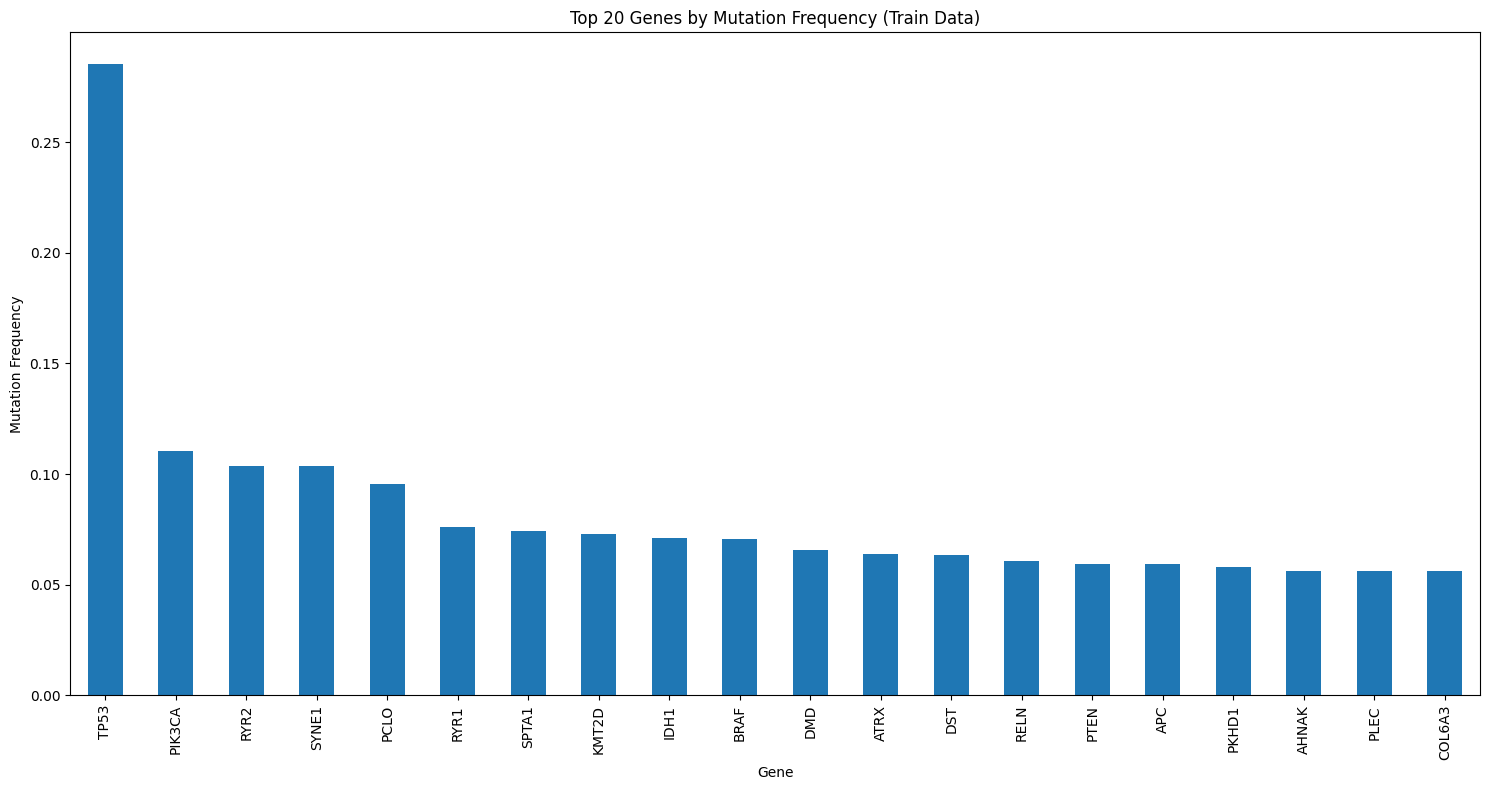

In [ ]:
# 상위 20개 유전자의 변이 빈도 시각화
plt.figure(figsize=(15, 8))
train_mutation_freq.head(20).plot(kind='bar')
plt.title('Top 20 Genes by Mutation Frequency (Train Data)')
plt.xlabel('Gene')
plt.ylabel('Mutation Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# SUBCLASS별 유전자 변이 빈도
subclass_mutation_freq = train_df.groupby('SUBCLASS').apply(lambda df: df.drop(columns=['ID', 'SUBCLASS']).apply(lambda x: x != 'WT').sum())
subclass_mutation_freq

<ipython-input-18-4fd90d2b972d>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  subclass_mutation_freq = train_df.groupby('SUBCLASS').apply(lambda df: df.drop(columns=['ID', 'SUBCLASS']).apply(lambda x: x != 'WT').sum())


,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
SUBCLASS,,,,,,,,,,,,,,,,,,,,,
ACC,0,0,0,0,0,1,2,1,0,2,...,1,1,1,0,0,1,1,1,0,1
BLCA,9,0,1,0,0,7,2,0,3,3,...,5,1,1,0,4,0,2,2,1,2
BRCA,7,2,2,0,8,9,5,9,15,7,...,14,4,1,1,8,3,2,3,3,2
CESC,3,3,2,0,0,5,7,6,5,5,...,4,3,1,1,4,3,1,4,2,2
COAD,11,3,1,0,5,17,0,7,15,10,...,18,3,2,0,13,3,3,3,4,1
DLBC,2,0,0,0,0,2,1,6,1,0,...,0,0,0,1,0,0,0,0,2,0
GBMLGG,3,1,0,0,1,2,1,1,8,3,...,6,2,0,1,3,0,4,4,0,2
HNSC,6,4,0,0,4,5,7,7,10,3,...,4,3,3,2,4,6,1,4,1,2
KIPAN,5,2,1,0,0,7,4,4,10,4,...,6,3,0,1,8,1,1,2,1,2


In [32]:
subclass_mutation_freq['TP53'].sort_values(ascending=False)[:15]

,TP53
SUBCLASS,
BRCA,218
STES,214
OV,190
GBMLGG,169
HNSC,147
LUSC,127
LGG,116
COAD,115
PAAD,79


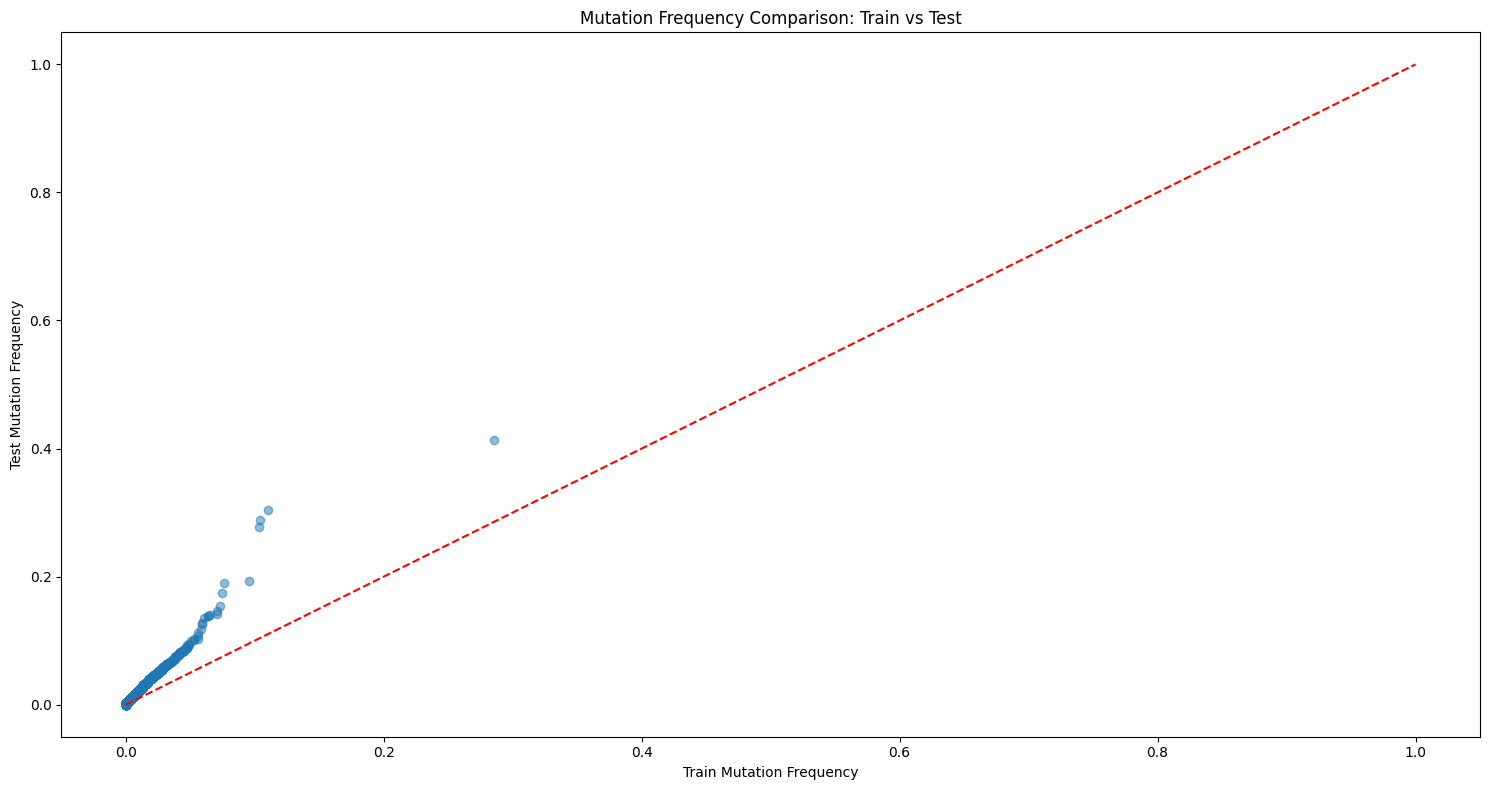

In [ ]:
# train과 test 데이터의 변이 빈도 비교
plt.figure(figsize=(15, 8))
plt.scatter(train_mutation_freq, test_mutation_freq, alpha=0.5)
plt.title('Mutation Frequency Comparison: Train vs Test')
plt.xlabel('Train Mutation Frequency')
plt.ylabel('Test Mutation Frequency')
plt.plot([0, 1], [0, 1], 'r--')  # 대각선
plt.tight_layout()
plt.show()

In [ ]:
# 변이 빈도 차이가 큰 상위 10개 유전자 출력
freq_diff = (train_mutation_freq - test_mutation_freq).abs().sort_values(ascending=False)
print("\nTop 10 genes with the largest difference in mutation frequency between train and test:")
print(freq_diff.head(10))


Top 10 genes with the largest difference in mutation frequency between train and test:
TCHH       0.253946
AHNAK      0.247725
APC        0.218114
CACNA1A    0.151581
CPEB2      0.139984
MAGEE1     0.135905
TP53       0.127367
KDM6B      0.125475
KMT2D      0.120514
TUBGCP6    0.119690
dtype: float64


In [ ]:
freq_diff.head(50)

,0
TCHH,0.253946
AHNAK,0.247725
APC,0.218114
CACNA1A,0.151581
CPEB2,0.139984
MAGEE1,0.135905
TP53,0.127367
KDM6B,0.125475
KMT2D,0.120514
TUBGCP6,0.119690


## 상관관계 분석

In [ ]:
# SUBCLASS 레이블 인코딩
le = LabelEncoder()
train_df['SUBCLASS_encoded'] = le.fit_transform(train_df['SUBCLASS'])

# 크래머 V 계산 함수
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

# 유전자 칼럼 선택
gene_columns = [col for col in train_df.columns if col not in ['ID', 'SUBCLASS', 'SUBCLASS_encoded']]

# SUBCLASS와 각 유전자 간의 크래머 V 계산
cramer_v_scores = {}
for gene in gene_columns:
    # 변이 여부로 이진화 ('WT'면 0, 그 외는 1)
    train_df[f'{gene}_mutated'] = (train_df[gene] != 'WT').astype(int)
    cramer_v_scores[gene] = cramers_v(train_df['SUBCLASS'], train_df[f'{gene}_mutated'])
    # 임시 칼럼 삭제
    train_df.drop(f'{gene}_mutated', axis=1, inplace=True)

# 결과를 데이터프레임으로 변환하고 정렬
cramer_v_df = pd.DataFrame.from_dict(cramer_v_scores, orient='index', columns=['Cramer_V'])
cramer_v_df = cramer_v_df.sort_values('Cramer_V', ascending=False)

<ipython-input-29-fe70ae9e054b>:11: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
<ipython-input-29-fe70ae9e054b>:11: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
<ipython-input-29-fe70ae9e054b>:11: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
<ipython-input-29-fe70ae9e054b>:11: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
<ipython-input-29-fe70ae9e054b>:11: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
<ipython-input-29-fe70ae9e054b>:11: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
<ipython-input-29-fe70ae9e054b>:11: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
<ipython-input-29-fe70ae9e054b>:11: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 /

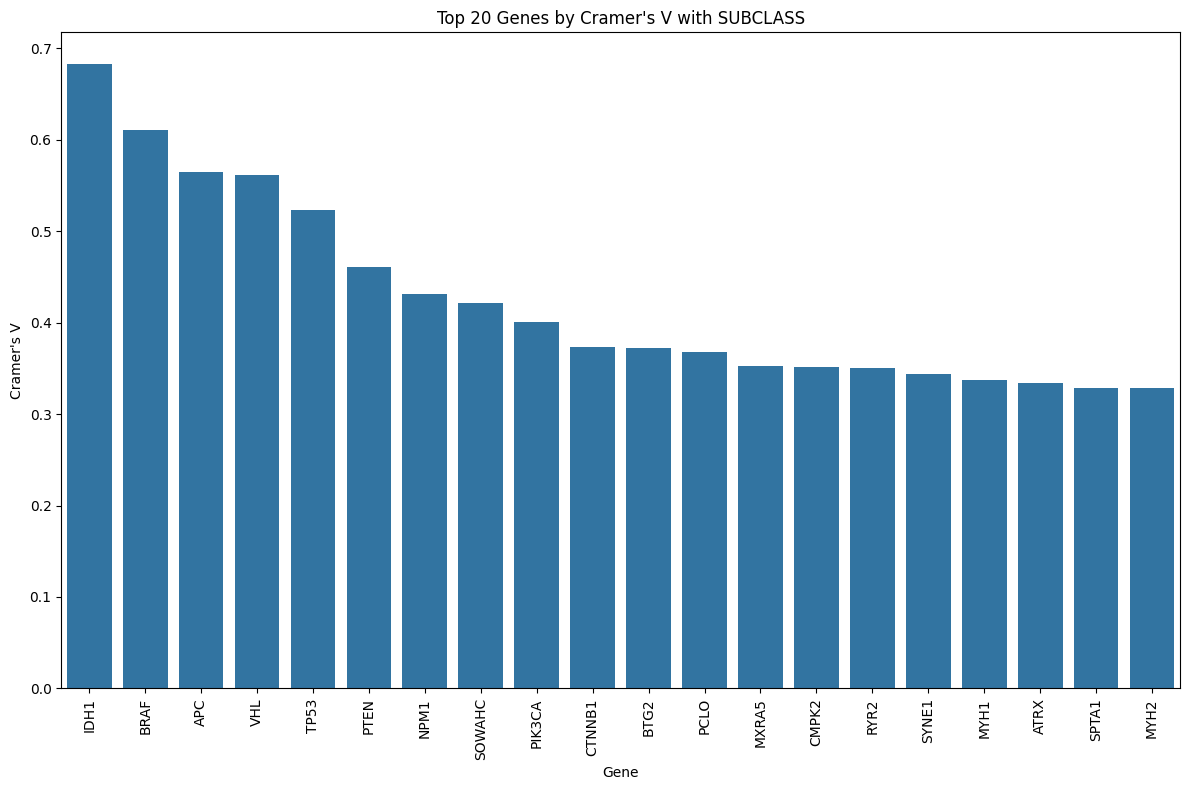

In [ ]:
# 상위 20개 유전자 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=cramer_v_df.head(20).index, y='Cramer_V', data=cramer_v_df.head(20))
plt.title('Top 20 Genes by Cramer\'s V with SUBCLASS')
plt.xlabel('Gene')
plt.ylabel('Cramer\'s V')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# 상위 20개 유전자 출력
print("Top 20 genes most associated with SUBCLASS:")
print(cramer_v_df.head(20))

Top 20 genes most associated with SUBCLASS:
        Cramer_V
IDH1    0.683059
BRAF    0.610888
APC     0.564561
VHL     0.561546
TP53    0.523550
PTEN    0.460393
NPM1    0.431579
SOWAHC  0.421728
PIK3CA  0.400438
CTNNB1  0.373161
BTG2    0.372505
PCLO    0.367512
MXRA5   0.352785
CMPK2   0.351019
RYR2    0.350549
SYNE1   0.343869
MYH1    0.337515
ATRX    0.334372
SPTA1   0.328416
MYH2    0.328213


In [ ]:
# 히트맵 생성을 위한 상위 30개 유전자 선택
top_30_genes = cramer_v_df.head(30).index.tolist()

# 상관관계 행렬 계산
correlation_matrix = train_df[['SUBCLASS_encoded'] + top_30_genes].apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)
correlation_matrix = correlation_matrix.corr()

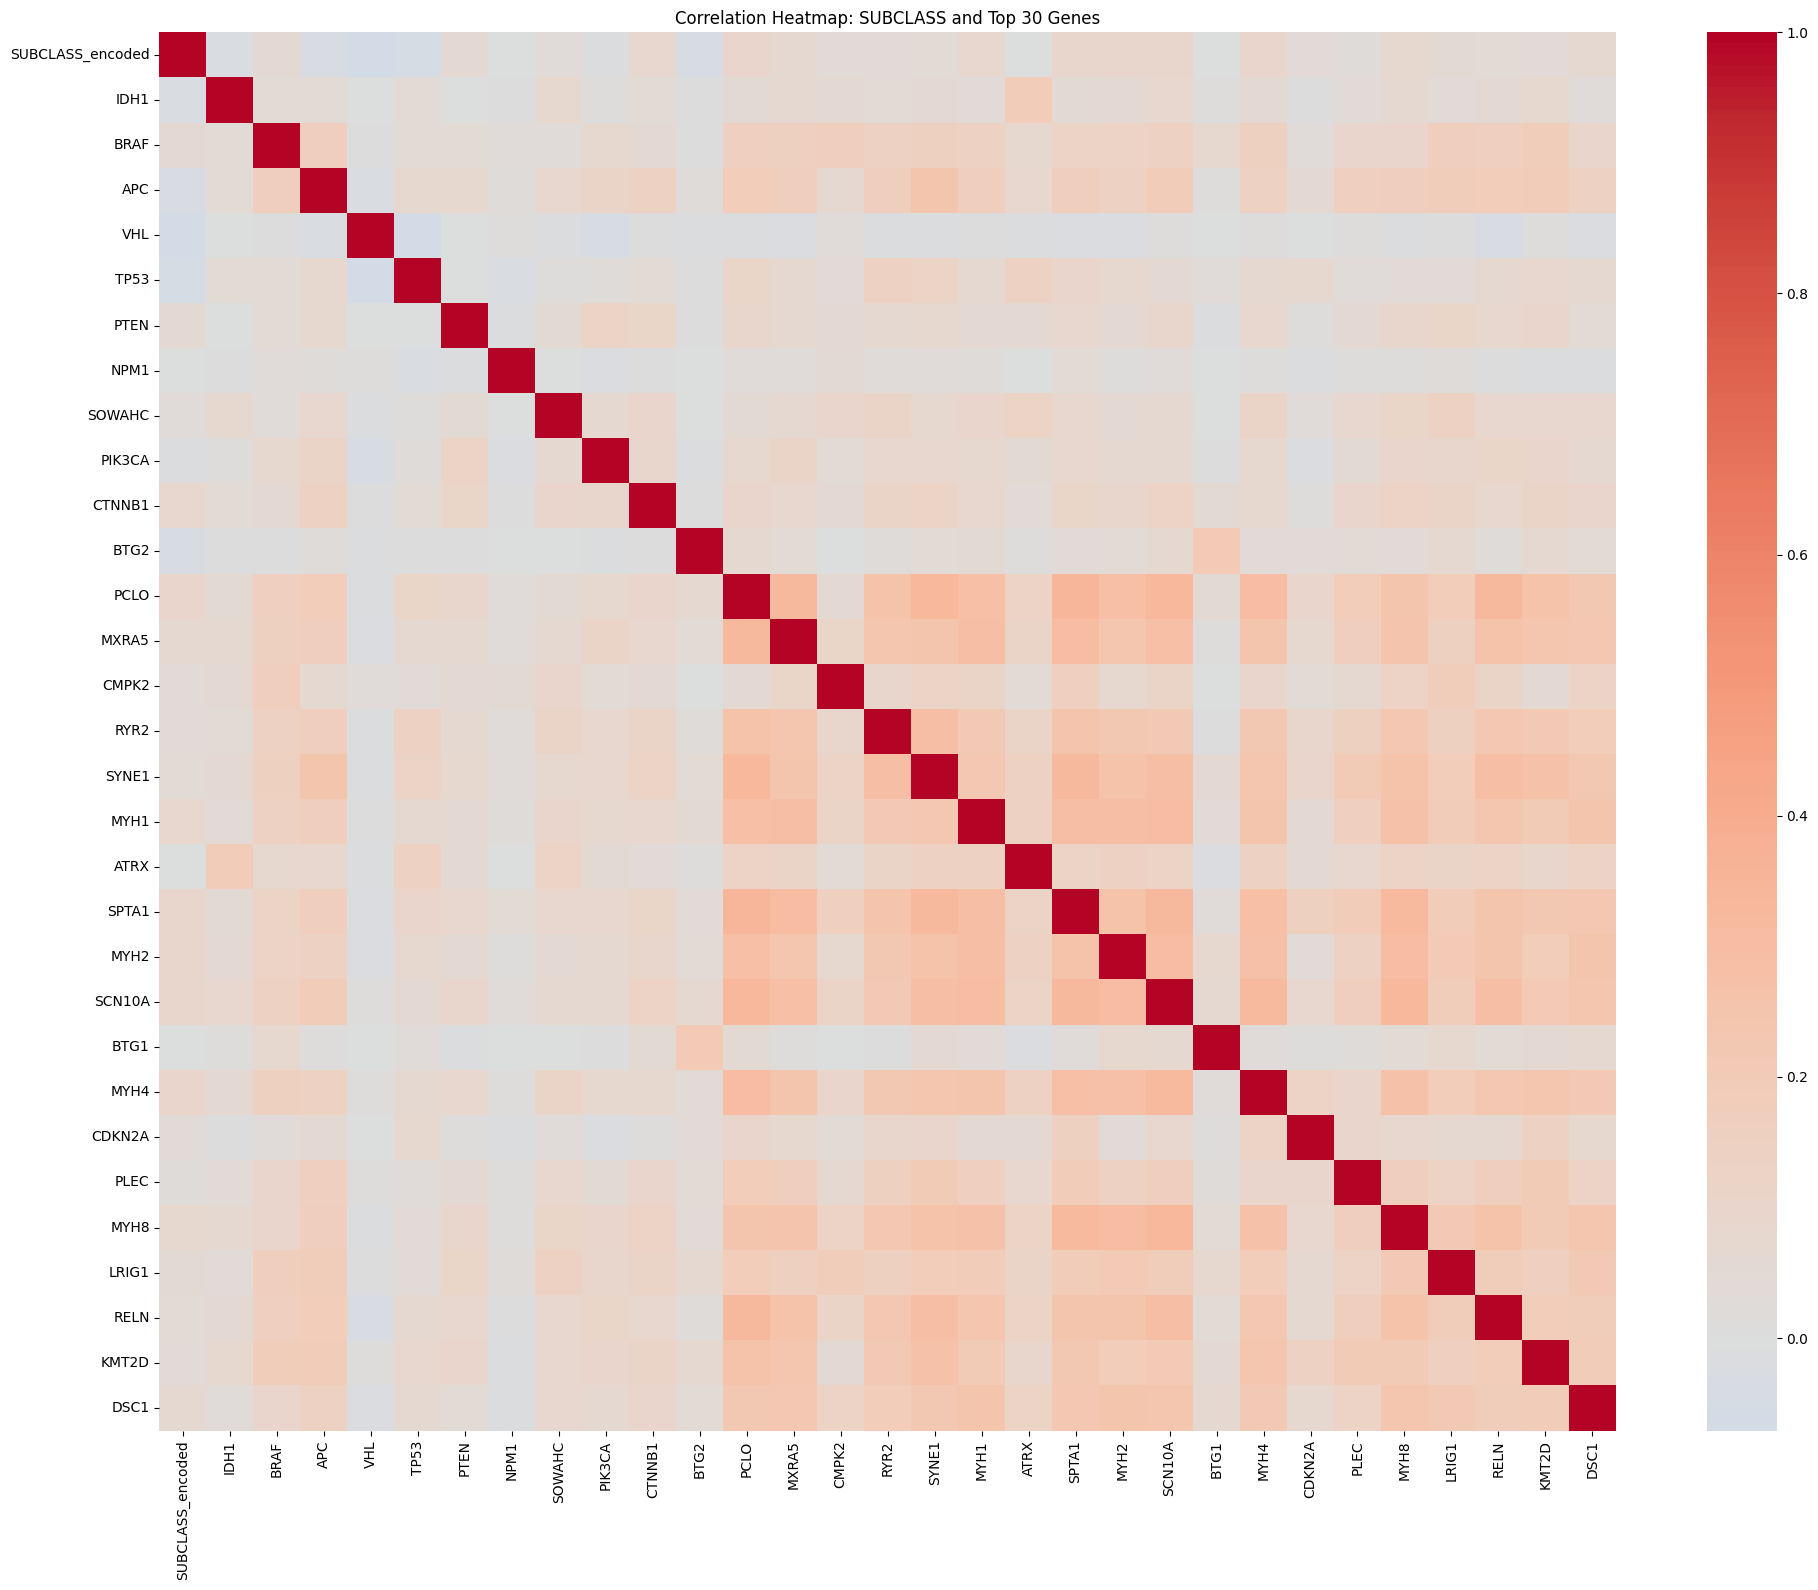

In [ ]:
# 히트맵 시각화
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: SUBCLASS and Top 30 Genes')
plt.tight_layout()
plt.show()

In [ ]:
# SUBCLASS와 상위 10개 유전자의 관계 시각화
top_10_genes = cramer_v_df.head(10).index.tolist()

plt.figure(figsize=(40, 200))
for i, gene in enumerate(top_10_genes, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='SUBCLASS', y=gene, data=train_df)
    plt.title(f'{gene} by SUBCLASS')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# csv로 저장

In [ ]:
train_mutation_freq.to_csv(file_path + 'train_mutation_freq.csv')
test_mutation_freq.to_csv(file_path + 'test_mutation_freq.csv')
subclass_mutation_freq.to_csv(file_path + 'subclass_mutation_freq.csv')
cramer_v_df.to_csv(file_path + 'cramer_v_df.csv')

In [ ]:
hotspot_mutations_df.to_csv(file_path + 'mutation_positions.csv')

In [ ]:
train_df.to_csv(file_path + 'label_encoding_train.csv')
test_df.to_csv(file_path + 'label_encoding_test.csv')

# unseen data 확인

In [ ]:
# 'ID'와 'SUBCLASS' 칼럼 제외
gene_columns = [col for col in train_df.columns if col not in ['ID', 'SUBCLASS', 'SUBCLASS_encoded']]

# 결과를 저장할 딕셔너리
unique_variants = {}

# 각 유전자(칼럼)에 대해 반복
for gene in gene_columns:
    # train에 있는 변이 유형
    train_variants = set(train_df[gene].unique())
    # test에 있는 변이 유형
    test_variants = set(test_df[gene].unique())

    # test에만 있는 변이 유형
    unique_to_test = test_variants - train_variants

    # 'WT'는 제외 (Wild Type이므로 변이가 아님)
    unique_to_test.discard('WT')

    # 결과가 있으면 딕셔너리에 저장
    if unique_to_test:
        unique_variants[gene] = list(unique_to_test)

# 결과 출력
for gene, variants in unique_variants.items():
    print(f"{gene}: {variants}")

# 총 유전자 수와 새로운 변이가 있는 유전자 수 출력
print(f"\nTotal number of genes: {len(gene_columns)}")
print(f"Number of genes with new variants in test set: {len(unique_variants)}")

Output hidden; open in https://colab.research.google.com to view.

# 모든 행이 WT 인 유전자 확인

In [10]:
# Step 4: 모든 행이 WT인 유전자 식별 (train과 test 모두)
# Combine train and test datasets for analysis, dropping 'ID' and 'SUBCLASS'
combined_df = pd.concat([train_df.drop(columns=['ID', 'SUBCLASS']), test_df.drop(columns=['ID'])], ignore_index=True)

# Identify genes where all rows in the combined dataset are WT (empty or 'WT')
wt_genes_combined = combined_df.columns[combined_df.apply(lambda x: (x == '') | (x == 'WT')).all()]
wt_genes_combined

Index(['BOLA2', 'CROCCP2', 'EEIG1', 'G6PC1', 'GPX4', 'H2AC25', 'HBBP1',
       'HYCC2', 'MIX23', 'MYL11', 'NHERF1', 'NHERF4', 'PALS1', 'PHB1',
       'PTTG3P', 'PVT1', 'RIGI', 'SELENOP', 'SELENOW', 'SKIC3', 'XIST'],
      dtype='object')

# 추가 분석

## 핫스팟 분석

In [34]:
# Step 2: 핫스팟 변이 분석
# 각 유전자의 변이 위치 추출 (위치가 있는 경우 추출)
def extract_mutation_positions(mutation_info):
    positions = []
    if isinstance(mutation_info, str) and mutation_info.strip():
        mutations = mutation_info.split(' ')  # 공백으로 분리하여 복수 변이 처리
        for mutation in mutations:
            position = ''.join(filter(str.isdigit, mutation))  # 변이에서 숫자(위치) 추출
            if position:
                positions.append(position)
    return positions

In [ ]:
# 핫스팟 변이 위치 및 빈도 계산
hotspot_mutations = {}
for gene in train_df.columns[2:]:  # Skip 'ID' and 'SUBCLASS'
    mutation_positions = train_df[gene].apply(extract_mutation_positions)
    mutation_positions_exploded = mutation_positions.explode().dropna()
    hotspot_mutations[gene] = mutation_positions_exploded.value_counts()


hotspot_mutations

In [40]:
# 핫스팟 변이 위치 및 빈도 계산 (SUBCLASS 정보 포함)
hotspot_mutations = {}

for gene in train_df.columns[2:]:  # Skip 'ID' and 'SUBCLASS'
    hotspot_mutations[gene] = {}  # 각 유전자를 위한 딕셔너리 초기화

    # 전체 변이 위치 계산 (모든 SUBCLASS 포함)
    mutation_positions = train_df[gene].apply(extract_mutation_positions)
    mutation_positions_exploded = mutation_positions.explode().dropna()
    hotspot_mutations[gene]['Overall'] = mutation_positions_exploded.value_counts()

    # SUBCLASS별 변이 위치 계산
    for subclass in train_df['SUBCLASS'].unique():
        subclass_data = train_df[train_df['SUBCLASS'] == subclass]
        subclass_mutation_positions = subclass_data[gene].apply(extract_mutation_positions)
        subclass_positions_exploded = subclass_mutation_positions.explode().dropna()
        hotspot_mutations[gene][subclass] = subclass_positions_exploded.value_counts()

# 결과
hotspot_mutations

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 핫스팟 변이 위치 및 빈도 정보를 데이터프레임으로 저장
hotspot_mutations_list = []

# hotspot_mutations 딕셔너리에서 데이터를 추출
for gene, subclasses in hotspot_mutations.items():
    for subclass, mutation_counts in subclasses.items():
        for position in mutation_counts.index:  # 빈도 정보 제외
            # 각 변이 위치와 관련 정보를 딕셔너리로 정리하여 리스트에 추가
            hotspot_mutations_list.append({
                'Gene': gene,
                'Subclass': subclass,
                'Mutation_Position': position
            })

# 리스트를 데이터프레임으로 변환
hotspot_mutations_df = pd.DataFrame(hotspot_mutations_list)

# 결과 데이터프레임 출력
hotspot_mutations_df

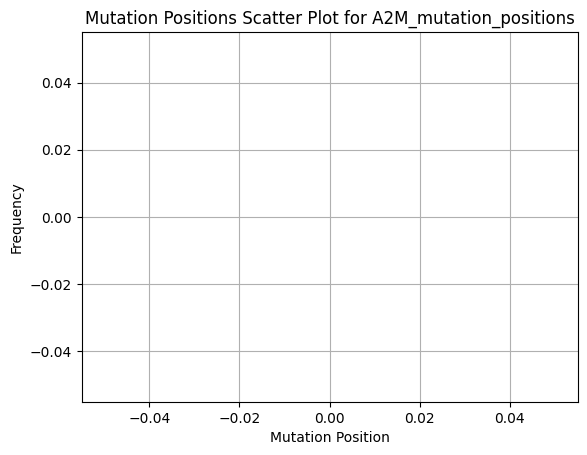

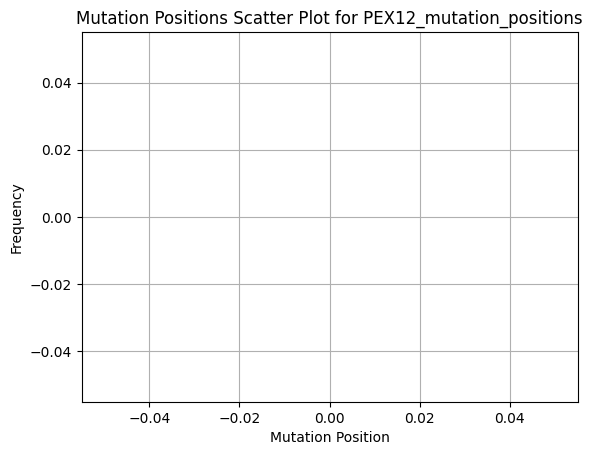

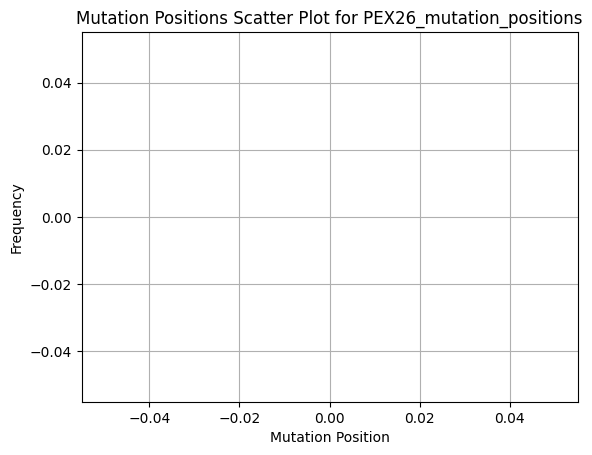

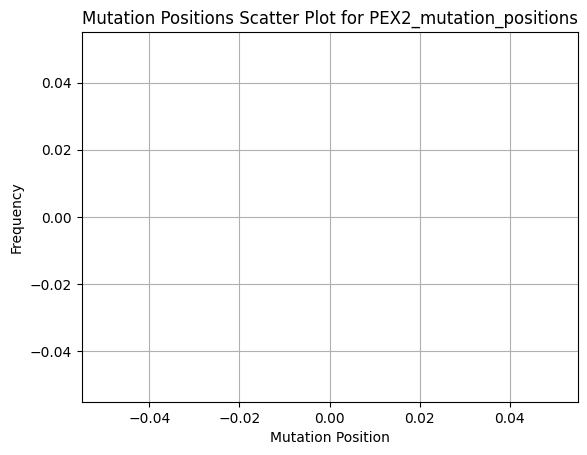

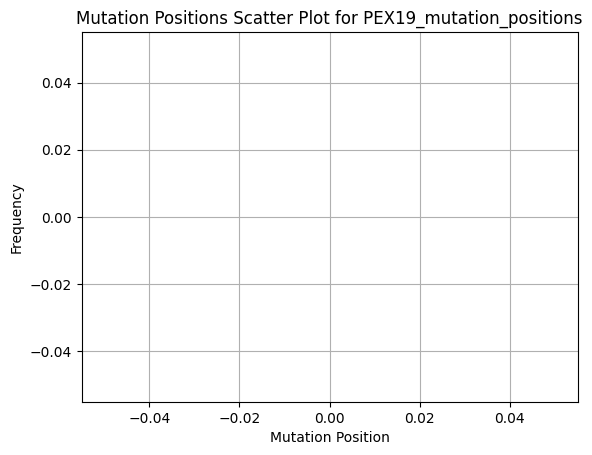

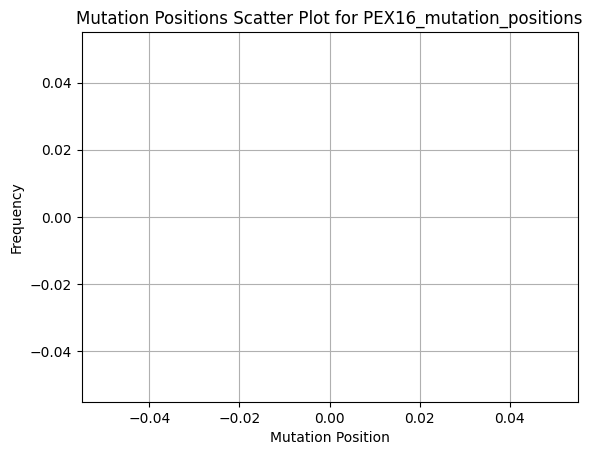

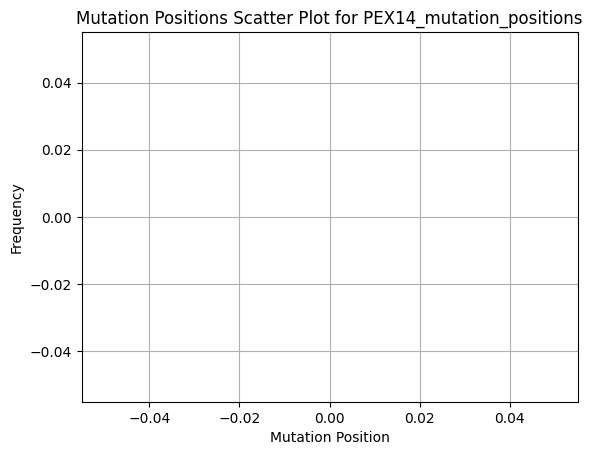

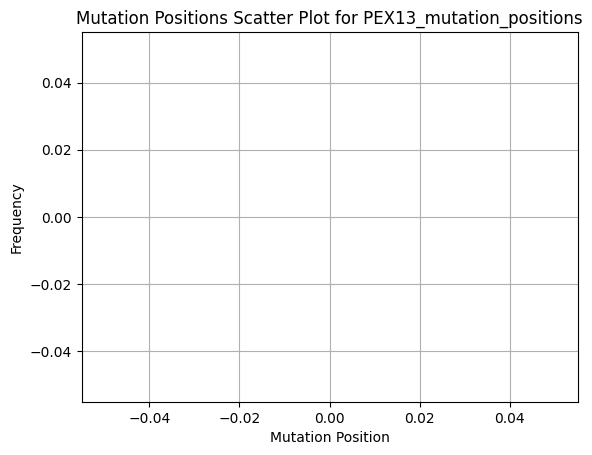

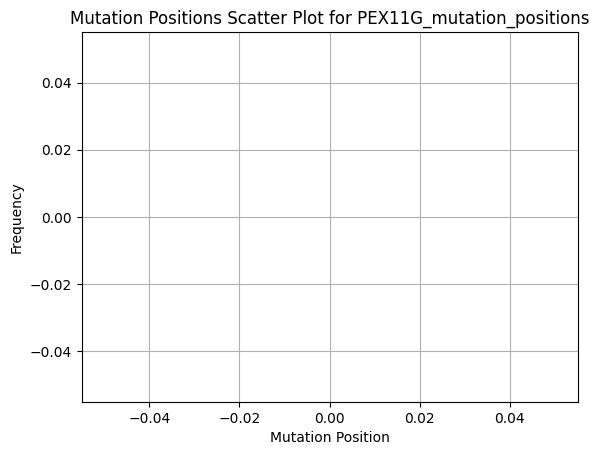

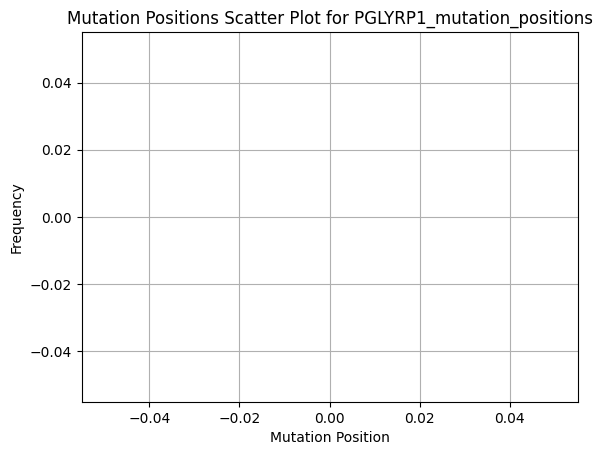

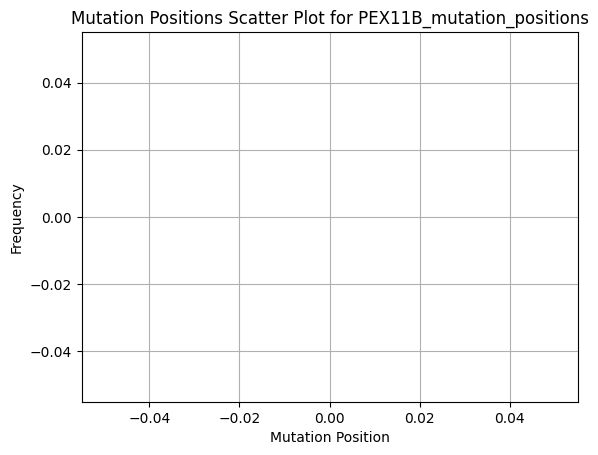

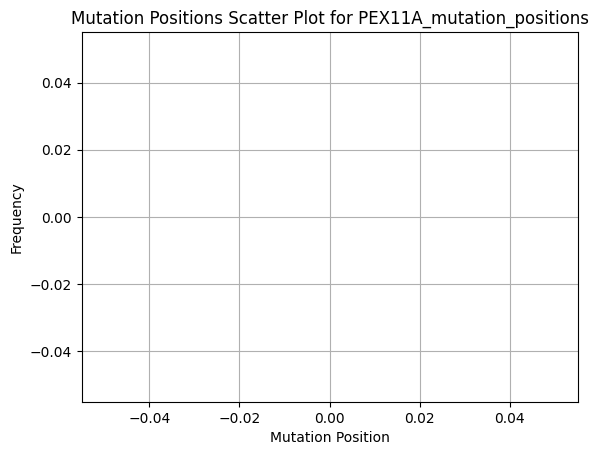

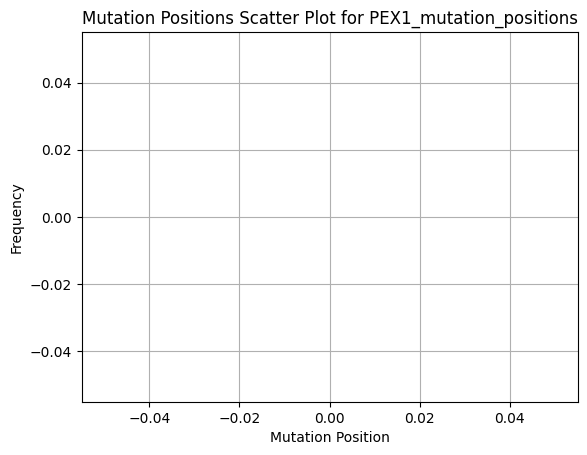

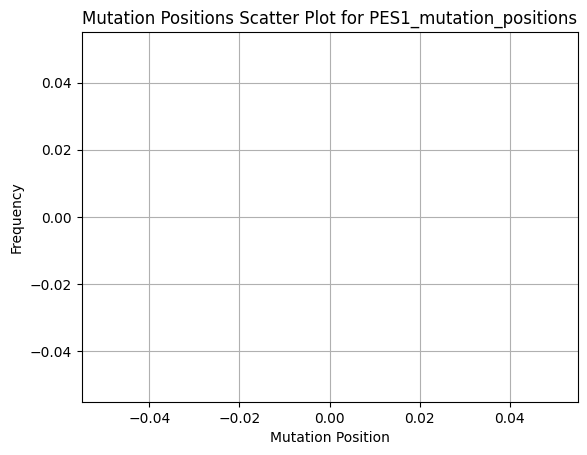

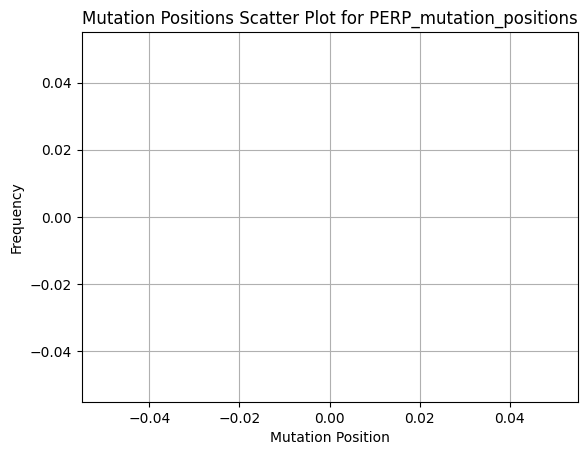

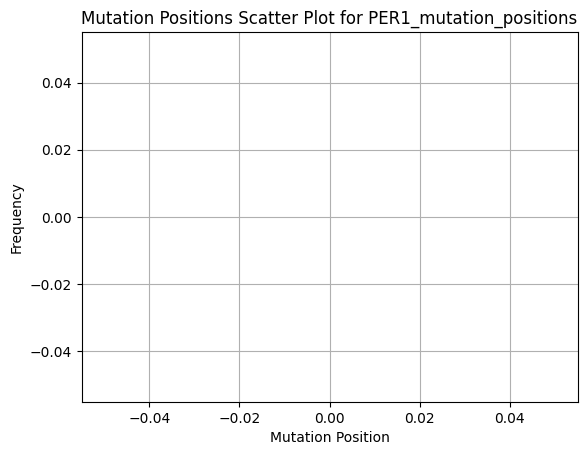

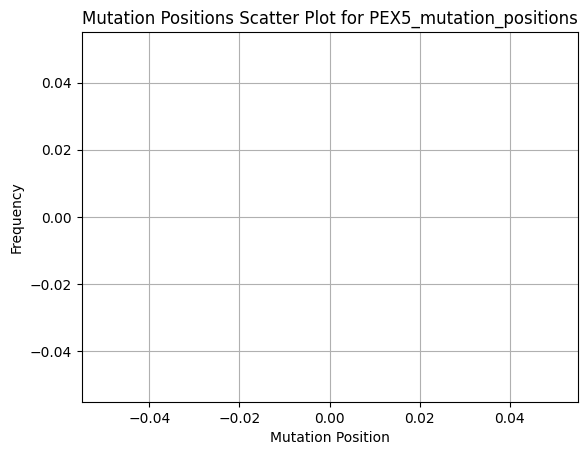

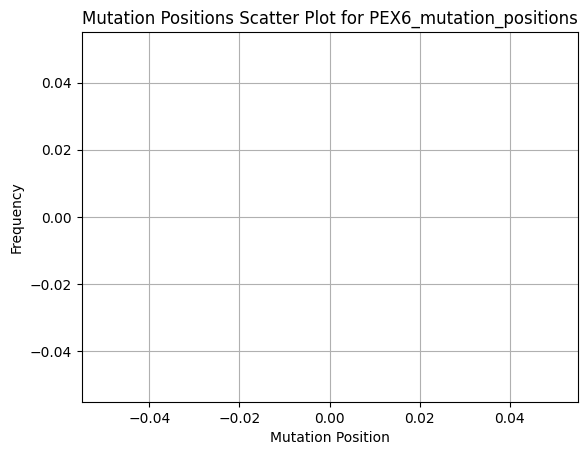

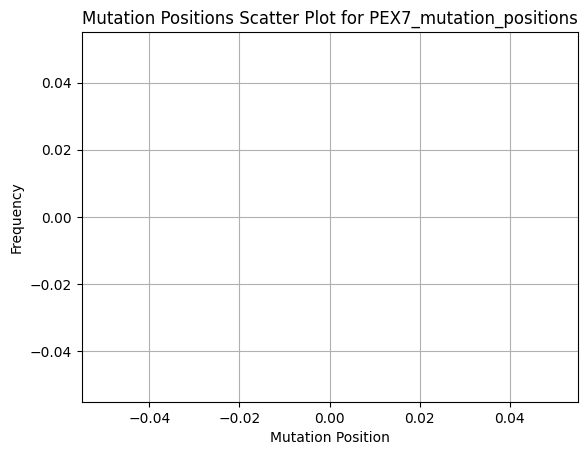

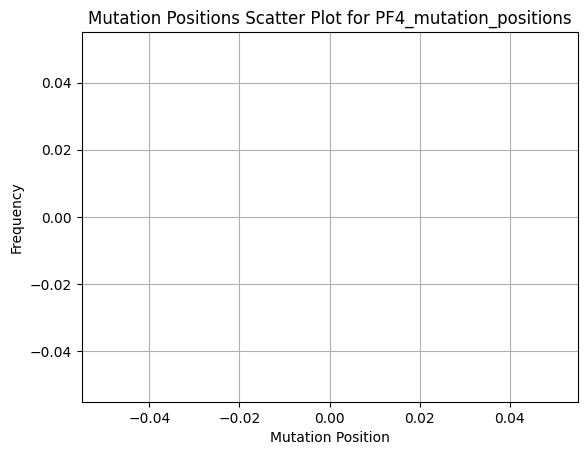

In [39]:
# Step 3: SUBCLASS 별 주요 유전자 변이 위치 산포도 그리기
# Helper function to convert mutation positions to integers
def convert_positions_to_int(positions):
    return [int(pos) for pos in positions if pos.isdigit()]

# Create scatter plots for each gene
for gene, positions in hotspot_mutations.items():
    if not positions.empty:
        position_values = convert_positions_to_int(positions.index.tolist())
        frequency_values = positions.values

        plt.figure()
        plt.scatter(position_values, frequency_values)
        plt.title(f'Mutation Positions Scatter Plot for {gene}')
        plt.xlabel('Mutation Position')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

## 암종별 특이 변이 패턴 분석

In [ ]:
# Step 4: 암종별 특이 변이 패턴 분석
mutation_patterns = {}
for subclass in train_df['SUBCLASS'].unique():
    subclass_data = train_df[train_df['SUBCLASS'] == subclass]
    mutation_patterns[subclass] = subclass_data.drop(columns=['ID', 'SUBCLASS']).apply(lambda x: x != '').sum()

mutation_patterns_df = pd.DataFrame(mutation_patterns)